In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
print(tf.__version__)

2022-03-27 18:27:30.439396: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


2.5.0


In [2]:
# Parameters
IMAGE_WIDTH = 32 
IMAGE_HEIGHT = 32
BATCH_SIZE = 8
n_classes = 34
train_dir = 'classification_dataset/all'
test_dir = 'classification_dataset/td/all'

train_dir = 'classification_dataset/reduced/train'
test_dir = 'classification_dataset/reduced/test'

# train_dir = 'classification_dataset/old/train'
# test_dir = 'classification_dataset/old/test'

# train_dir = 'classification_dataset/train'
# test_dir = 'classification_dataset/test'

train_dir = 'classification_dataset/new/test/all'
test_dir = 'classification_dataset/new/val/all'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,     #Random rotation between 0 and 45
    width_shift_range=0.1,   #% shift
    height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
)

train_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    subset='training'
    
)
valid_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    subset='validation'
)

testgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
test_generator = testgen.flow_from_directory(
    test_dir,
    shuffle=True,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
)

Found 196132 images belonging to 34 classes.
Found 49010 images belonging to 34 classes.
Found 163216 images belonging to 34 classes.


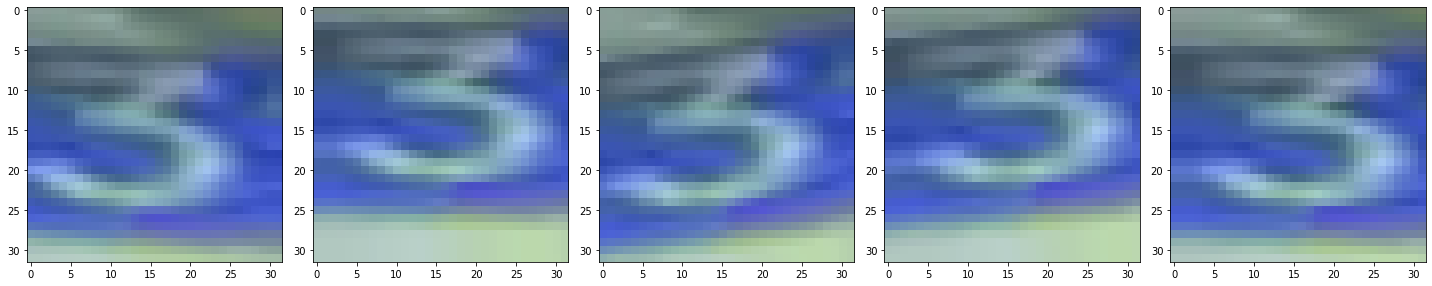

In [4]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_generator[1][0][0] for i in range(5)]
plotImages(augmented_images)

In [5]:
# def build_model(num_classes):
#     model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
#                            input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
#     tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])
#     return model
# model = build_model(num_classes=n_classes)


In [6]:
from    tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def VGG16(nb_classes, input_shape):
    input_tensor = Input(shape=input_shape)
    # 1st block
    x = Conv2D(64, (3,3), activation='relu', padding='same',name='conv1a')(input_tensor)
    x = Conv2D(64, (3,3), activation='relu', padding='same',name='conv1b')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'pool1')(x)
    # 2nd block
    x = Conv2D(128, (3,3), activation='relu', padding='same',name='conv2a')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same',name='conv2b')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'pool2')(x)
    # 3rd block
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='conv3a')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='conv3b')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='conv3c')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'pool3')(x)
    # 4th block
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv4a')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv4b')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv4c')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'pool4')(x)
    # 5th block
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv5a')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv5b')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='conv5c')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'pool5')(x)
    # full connection
    x = Flatten()(x)
    x = Dense(4096, activation='relu',  name='fc6')(x)
    x = Dropout(0.6)(x)
    x = Dense(4096, activation='relu', name='fc7')(x)
    x = Dropout(0.6)(x)
    output_tensor = Dense(nb_classes, activation='softmax', name='fc8')(x)

    model = Model(input_tensor, output_tensor)
    return model

model=VGG16(n_classes, (IMAGE_HEIGHT, IMAGE_WIDTH, 3))

2022-03-27 18:27:54.956596: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-27 18:27:55.018118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 18:27:55.018829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-03-27 18:27:55.018940: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-27 18:27:55.029975: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-27 18:27:55.030135: I tensorflow/stream_executor/platform/de

In [7]:
# model = tf.keras.applications.VGG19(
#     include_top=False, weights=None, input_tensor=None,
#     input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3), classes=n_classes,
#     classifier_activation='softmax'
# )

model.compile(
    optimizer=tf.keras.optimizers.Adagrad(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

EPOCHS = 5

with tf.device('/GPU:0'):
    history = model.fit(train_generator,
                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=valid_generator,
                        validation_steps= valid_generator.samples // BATCH_SIZE,
                        verbose=1
                        )


/home/mihai/TFG/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-03-27 18:27:57.472638: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-27 18:27:57.491520: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799925000 Hz


Epoch 1/5


2022-03-27 18:27:58.983402: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-03-27 18:27:59.756386: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2022-03-27 18:28:00.514933: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-27 18:28:01.100305: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


24516/24516 [==============================] - 1581s 64ms/step - loss: 0.7805 - accuracy: 0.7882 - val_loss: 0.1508 - val_accuracy: 0.9608
Epoch 2/5
24516/24516 [==============================] - 1562s 64ms/step - loss: 0.1258 - accuracy: 0.9668 - val_loss: 0.1126 - val_accuracy: 0.9719
Epoch 3/5
24516/24516 [==============================] - 1807s 74ms/step - loss: 0.0965 - accuracy: 0.9748 - val_loss: 0.0916 - val_accuracy: 0.9762
Epoch 4/5
 8664/24516 [=========>....................] - ETA: 24:12 - loss: 0.0828 - accuracy: 0.9785

KeyboardInterrupt: 

In [ ]:
modelVG = tf.keras.applications.VGG19(
    include_top=False, weights=None, input_tensor=None,
    input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3), classes=n_classes,
    classifier_activation='softmax'
)

In [ ]:
results = model.evaluate(test_generator,batch_size=BATCH_SIZE)

In [ ]:
model.save(' modelClasNew.h5')



In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('loss.png')
    plt.show()
save_plots(train_acc, valid_acc, train_loss, valid_loss)

In [ ]:
import numpy as np
a = np.asarray([train_acc,valid_acc,train_loss,valid_loss])
np.savetxt("model_new_data.csv", a, delimiter=",")